# Projects

This page shows stats about the Open Seeds projects

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

In [2]:
baseurl = "https://raw.githubusercontent.com/open-life-science/open-life-science.github.io/main/_data/artifacts/openseeds/"
project_df = (
    pd.read_csv(f"{baseurl}projects.csv", index_col=0, na_filter=False)
    .assign(
        participants=lambda df: df.participants.str.split(", "),
        participantNb=lambda df: df.participants.str.len(),
        mentors=lambda df: df.mentors.str.split(", "),
        keywords=lambda df: df.keywords.str.split(", "),
        cohort=lambda df: "OLS-" + df.cohort.astype(str),
    )
)

Number of projects over all cohorts

In [3]:
len(project_df)

238

## Cohorts

In [4]:
cohort_df = (
    project_df
    .groupby(by="cohort")
    .count()
    .drop(columns = ["participants", "mentors", "description", "keywords", "status", "collaboration", "participantNb"])
    .rename(columns = {"name": "Total"})
)

Aggregating statistic of number of projects per cohort

In [5]:
cohort_df.Total.describe()

count     8.000000
mean     29.750000
std       5.391793
min      20.000000
25%      26.750000
50%      30.500000
75%      33.250000
max      37.000000
Name: Total, dtype: float64

Mean number of projects per cohort

In [6]:
cohort_df.Total.median()

30.5

Text(0.5, 0, '')

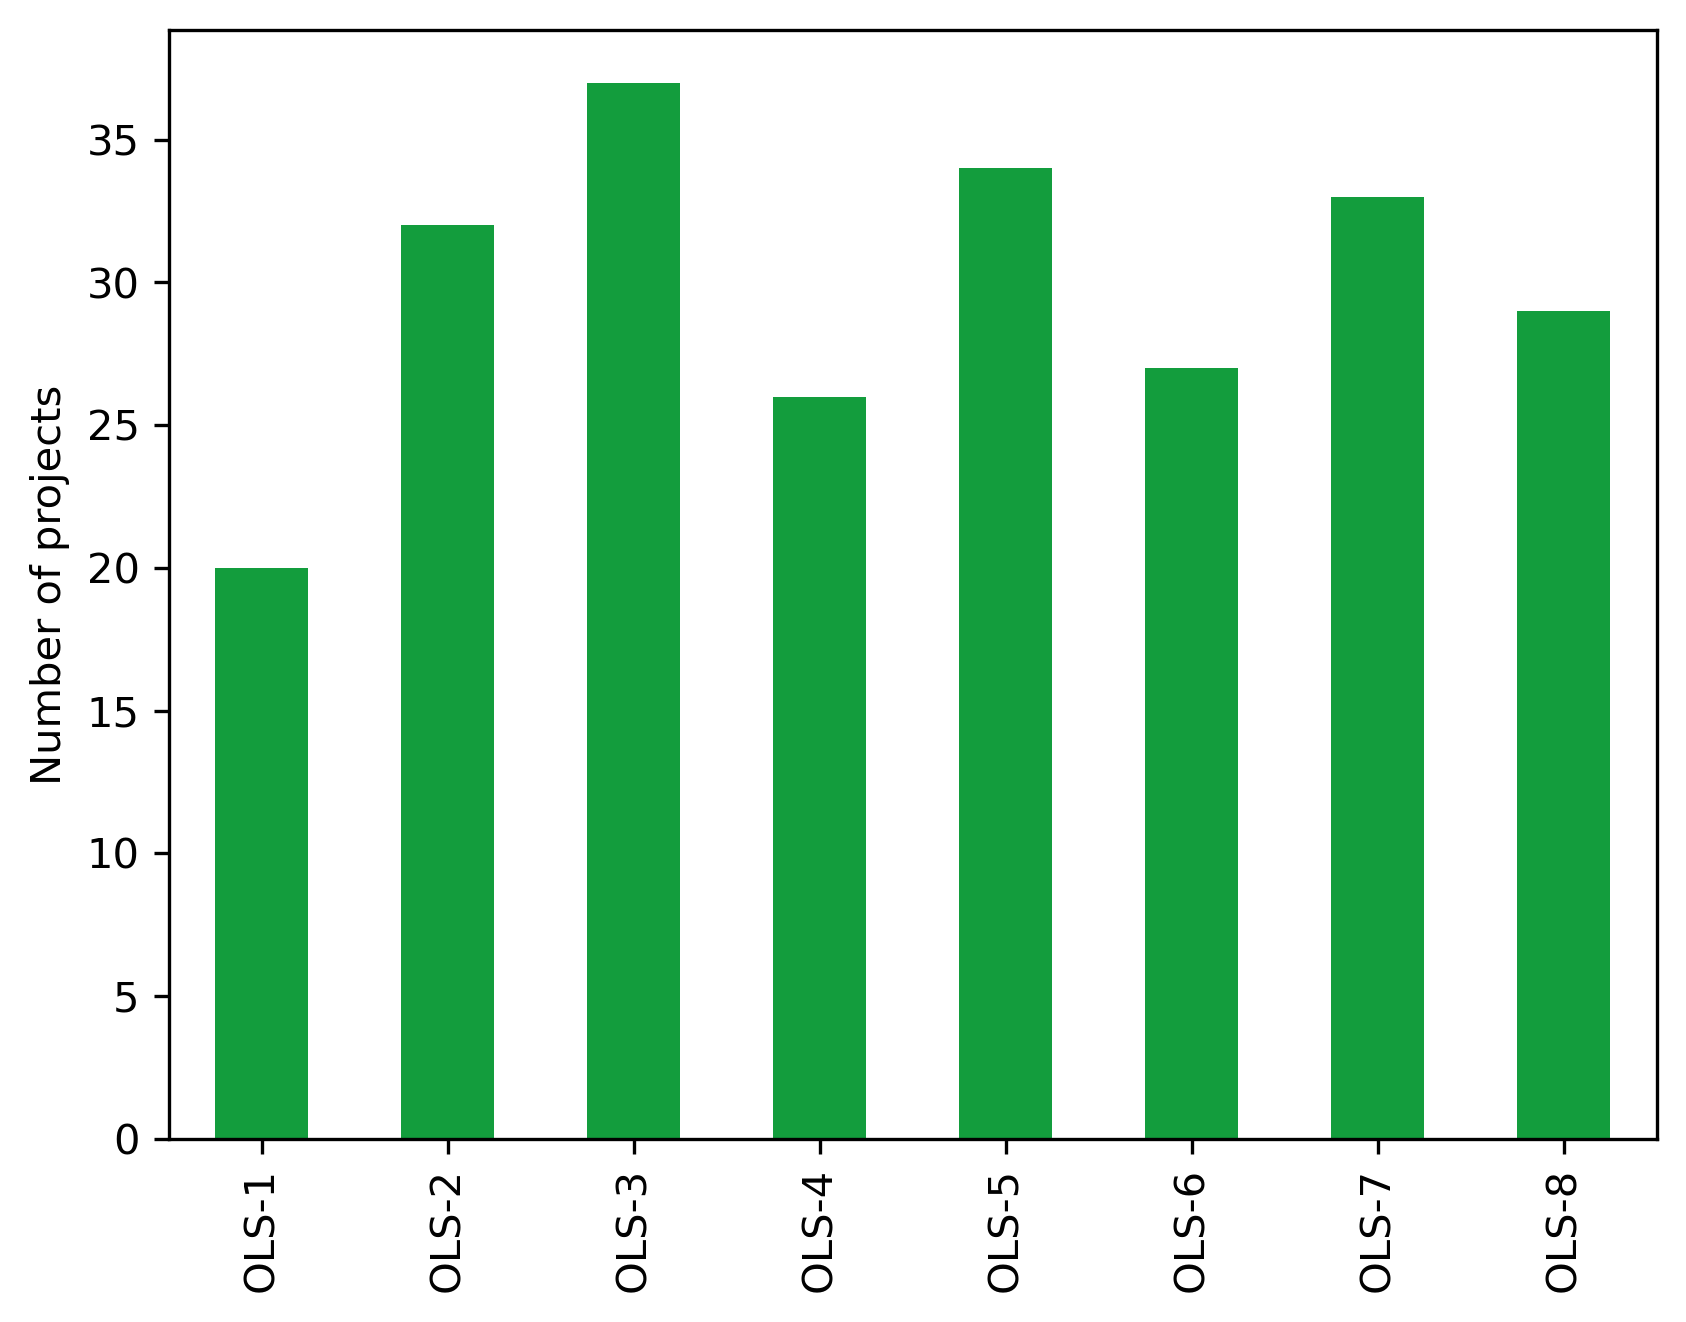

In [7]:
fig, ax = plt.subplots()
fig.set_dpi(300)
(cohort_df.Total
     .transpose()
     .plot.bar(ax=ax, color="#139D3D"))
plt.ylabel("Number of projects")
plt.xlabel("")

## Participants

Aggregating statistic of the number of participants per projects

In [8]:
project_df.participantNb.describe()

count    238.000000
mean       1.756303
std        1.346766
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: participantNb, dtype: float64

Distribution of the number of participants per project

Text(0.5, 0, 'Number of participants per projects')

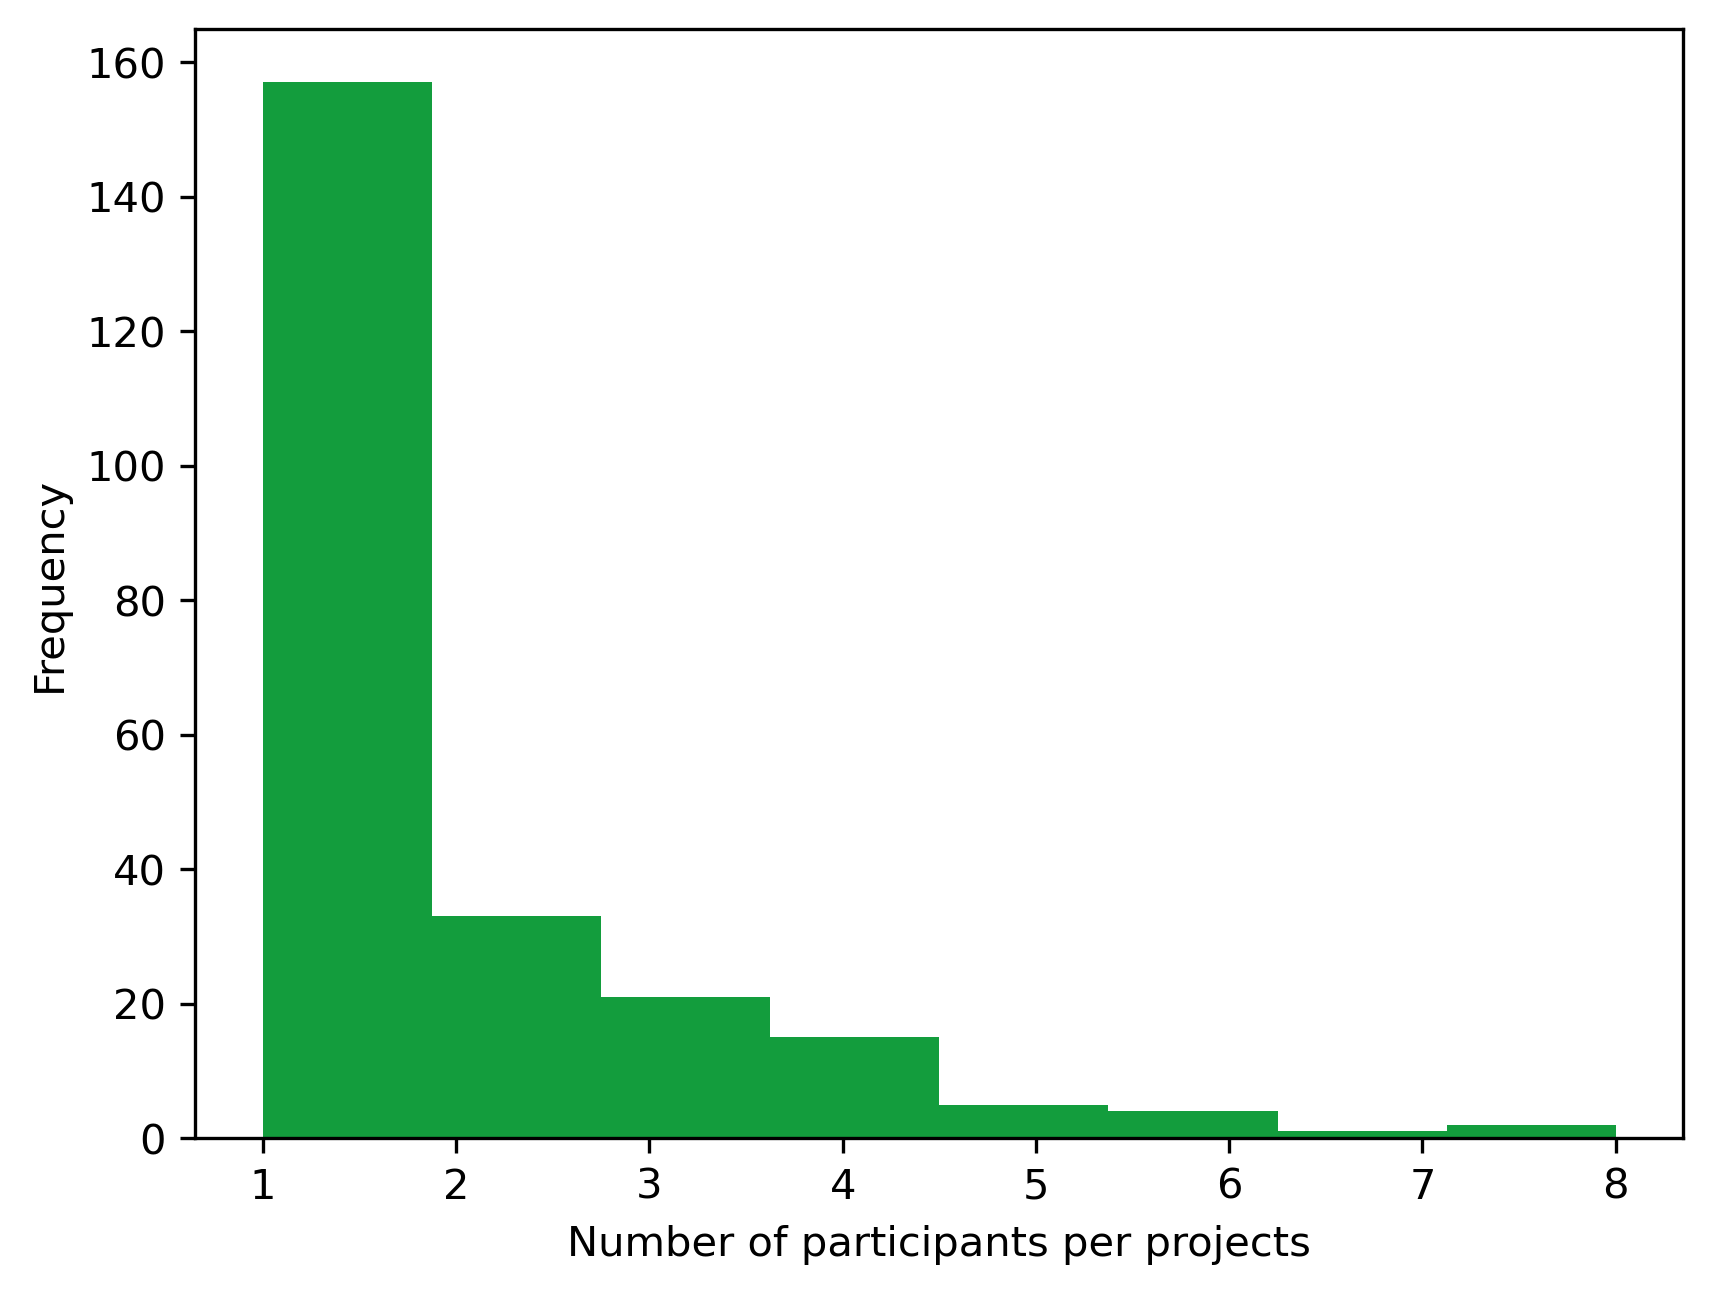

In [9]:
fig, ax = plt.subplots()
fig.set_dpi(300)
project_df.participantNb.plot.hist(
    bins=8, ax=ax, legend=False, color="#139D3D"
)
plt.xlabel('Number of participants per projects')

Text(0.5, 0, '')

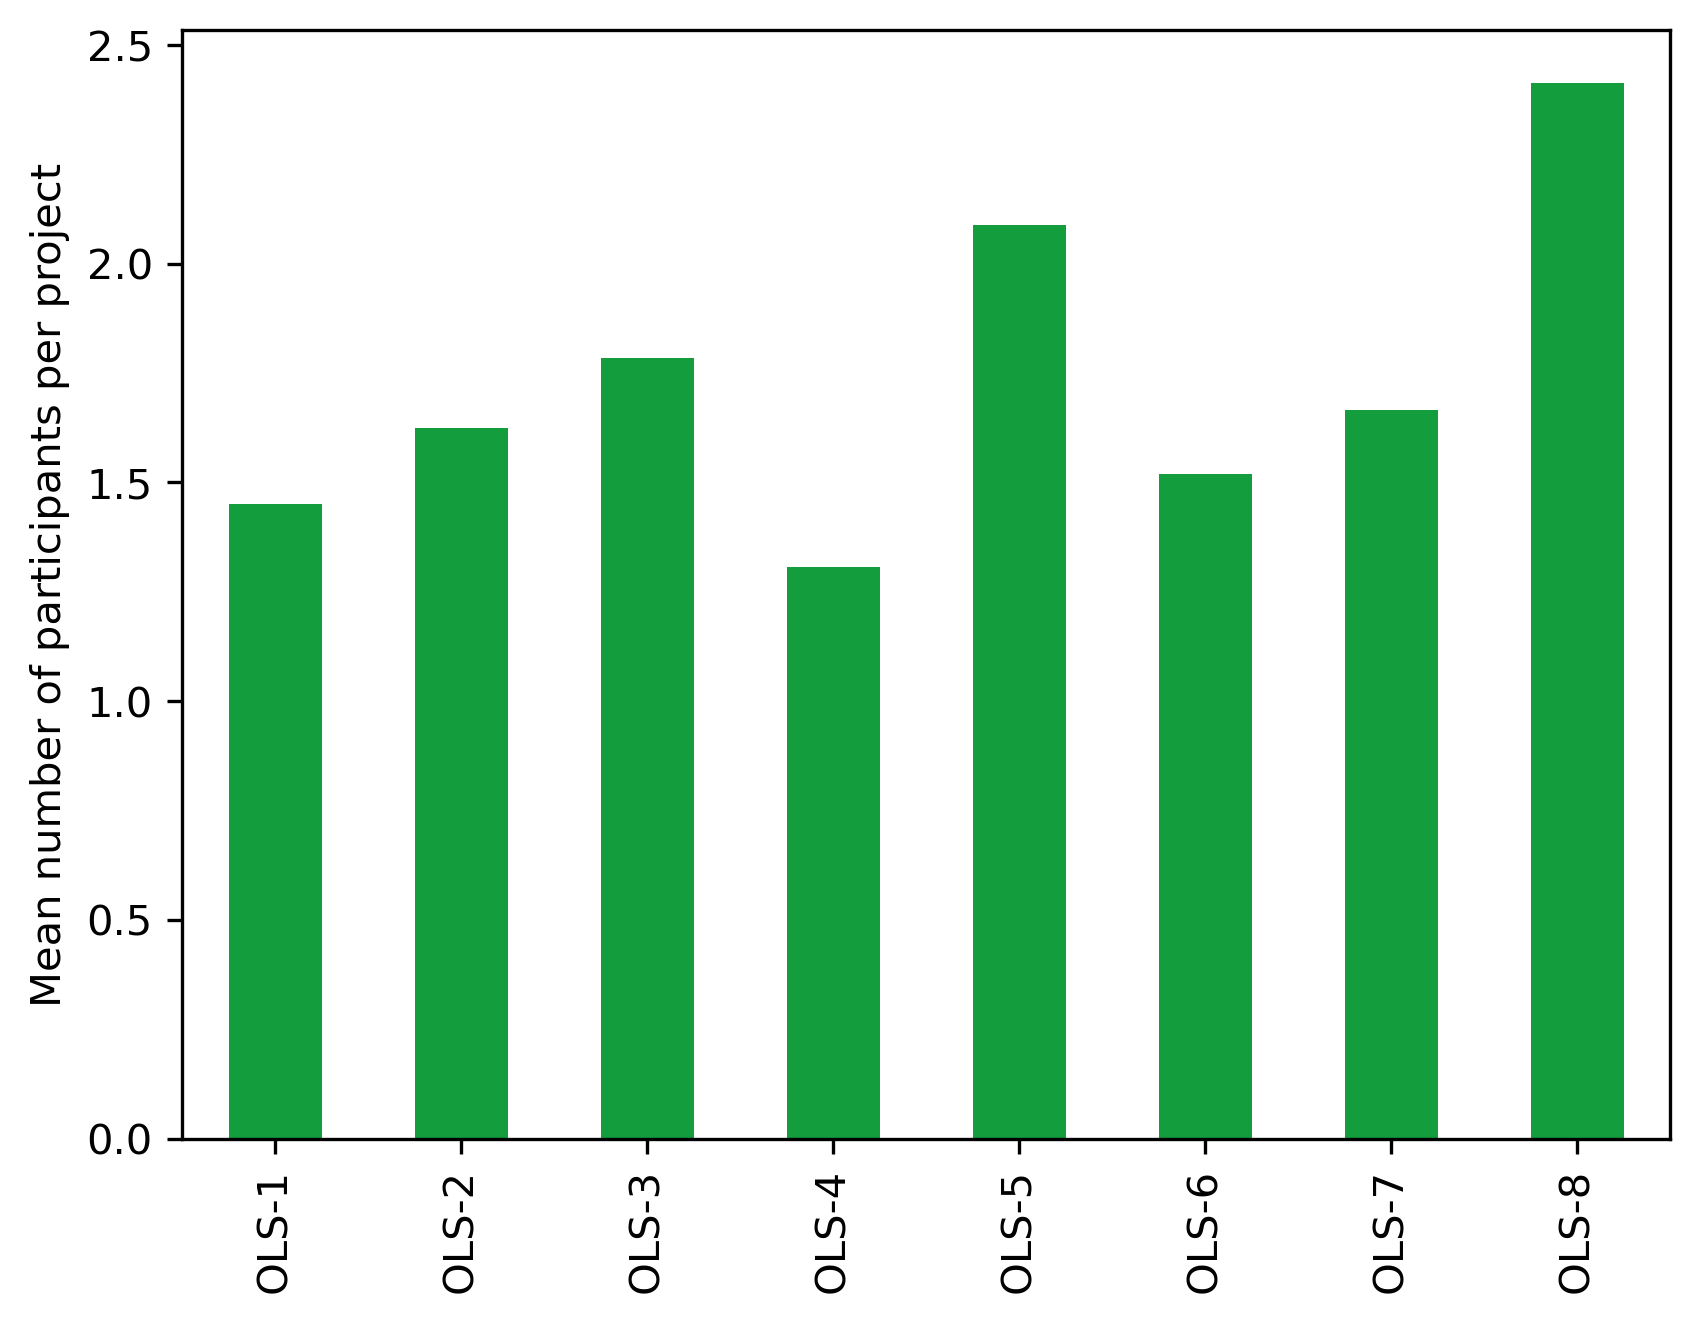

In [10]:
cohort_df = (project_df
    .drop(columns = ["name", "participants", "mentors", "description", "keywords", "status", "collaboration", "status", "graduation"])
    .groupby(by="cohort")
    .mean()
)
fig, ax = plt.subplots()
fig.set_dpi(300)
(cohort_df.participantNb
     .transpose()
     .plot.bar(ax=ax, color="#139D3D"))
plt.ylabel("Mean number of participants per project")
plt.xlabel("")

Text(0.5, 0, '')

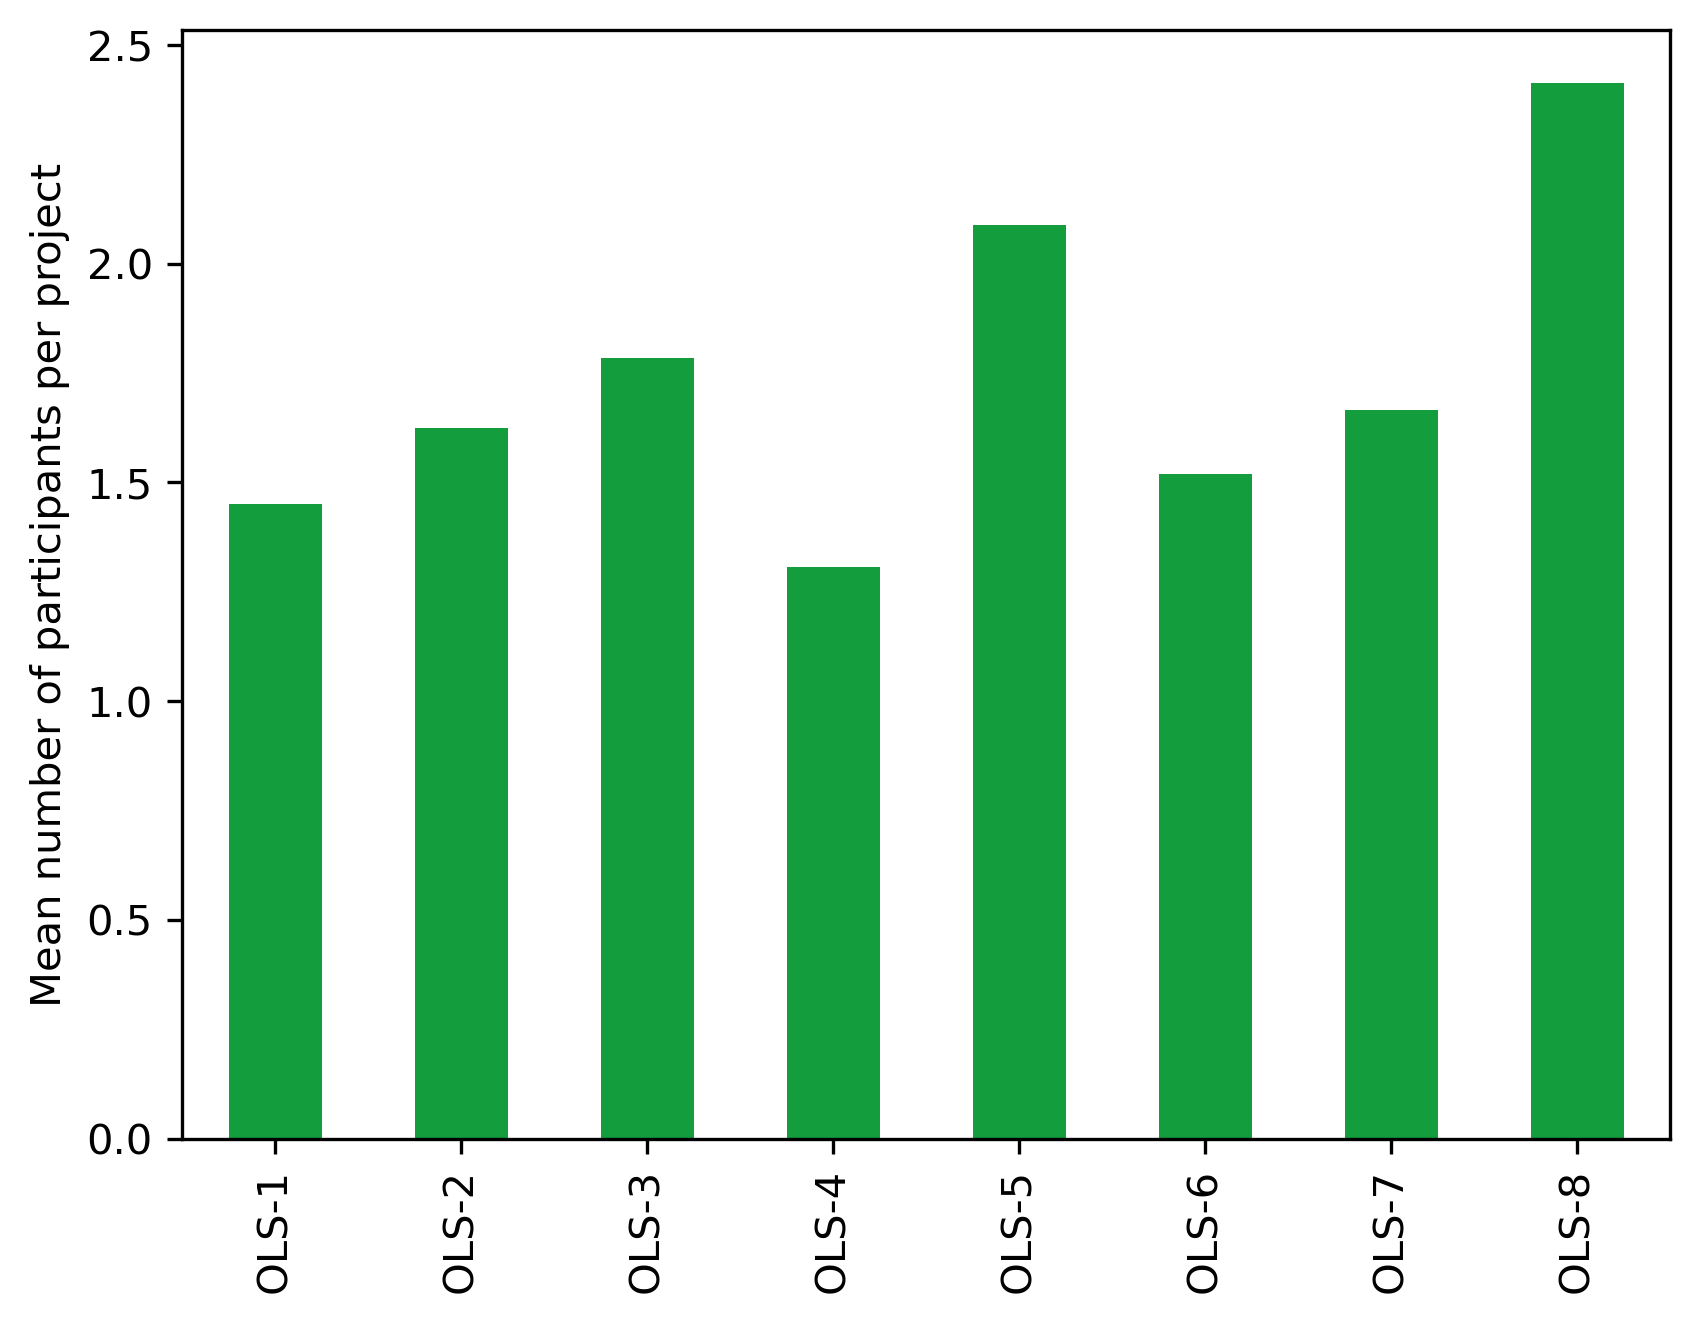

In [11]:
cohort_df = (project_df
    .drop(columns = ["name", "participants", "mentors", "description", "keywords", "status", "collaboration", "status", "graduation"])
    .groupby(by="cohort")
    .mean()
)
fig, ax = plt.subplots()
fig.set_dpi(300)
(cohort_df.participantNb
     .transpose()
     .plot.bar(ax=ax, color="#139D3D"))
plt.ylabel("Mean number of participants per project")
plt.xlabel("")

## Keywords

In [12]:
keyword_df = (project_df
    .drop(columns = ["participantNb", "participants", "mentors", "description", "status", "cohort", "collaboration", "status", "graduation"])
    .explode("keywords")
    .assign(keywords=lambda df: df.keywords.str.capitalize())
    .replace("Community building", "Community")
    .replace("Research community", "Community")
    .replace("Ethics of ai", "Ethical AI")
    .replace("Ethical ai", "Ethical AI")
    .replace("Enviromental", "Environmental science")
    .replace("Equal opportunity", "Equality")
    .replace("Training", "Training and education")
    .replace("Education", "Training and education")
    .replace("Artificial intelligence", "AI")
    .replace("Ai", "AI")
    .replace("Fair", "FAIR")
    .replace("Open-source", "Open source")
    .replace("Open source software", "Open source")
    .replace("Opensource", "Open source")
    .replace("Os", "Open source")
    .replace("Open source projects", "Open source")
    .replace(" data science", "Data science")
    .replace("Visualisation", "Data visualisation")
    .replace("Next-generation sequencing", "Sequencing")
    .replace("Open educational resource", "Open education")
    .replace("Reproducible research", "Reproducibility")
    .replace("Data", "Data science")
    .replace("Open community", "Community")
    .groupby(by="keywords")
    .count()
    .rename(columns={"name": "Frequency"})
    .sort_values("Frequency", ascending=False)
)

In [13]:
keyword_df.head(10)

,Frequency
keywords,
,63
Community,36
Training and education,20
Open science,19
Open source,18
Reproducibility,13
Data science,12
Machine learning,10
AI,9


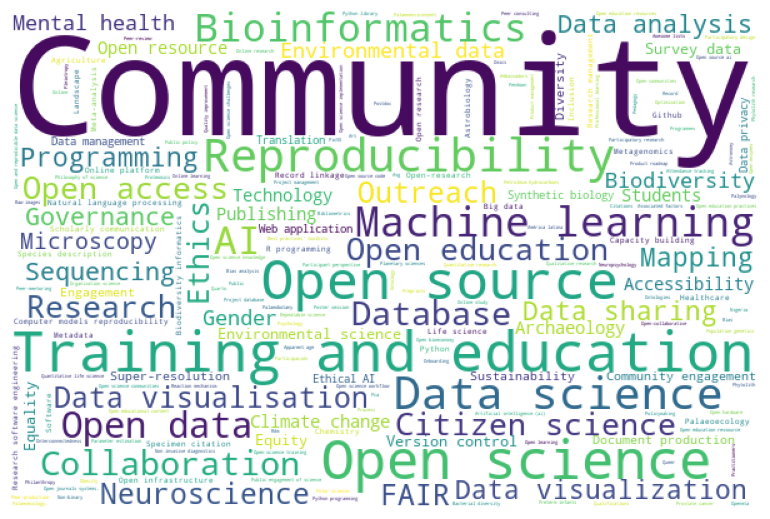

In [14]:
frec = keyword_df.Frequency.to_dict()

wc = WordCloud(
    background_color="rgba(255, 255, 255, 0)",
    random_state=42,
    width=600,
    height=400,
)

wordcloud = wc.generate_from_frequencies(frec)

fig, ax = plt.subplots(figsize=(13, 5))
ax.imshow(wc)

plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Graduated / non graduated projects

Percentage of graduated project

In [24]:
100 * len(project_df.query('status == "graduated"'))/len(project_df.status)

72.26890756302521

In [ ]:
Percentage of graduated project within collaboration

In [26]:
100 * len(project_df.query('status == "graduated" and collaboration != ""'))/len(project_df.query('collaboration != ""'))

94.11764705882354

### Projects that did not graduated

In [31]:
non_graduated_project = (
    project_df.query('status != "graduated"')
    .drop(columns=["description", "keywords", "status", "graduation", "collaboration", "participantNb"])
)
non_graduated_project["participants"] = non_graduated_project["participants"].apply(lambda x: ", ".join(str(i) for i in x))
non_graduated_project["mentors"] = non_graduated_project["mentors"].apply(lambda x: ", ".join(str(i) for i in x))
non_graduated_project.to_csv("../results/openseeds/non_graduated_project.csv", sep="\t", index=False)

Project that did graduated but came back

In [38]:
project_df[project_df.name.duplicated(keep=False)]

,name,participants,mentors,description,cohort,keywords,status,graduation,collaboration,participantNb
105,Bioinformatics Secondary school Outreach in Ni...,[Emmanuel Adamolekun],[Meag Doherty],Bioinformatics Secondary School Outreach (BSSO...,OLS-4,"[outreach, secondary school outreach, training...",,,,1
111,Hub23: An open source community and infrastruc...,"[Lydia France, Luke Hare, Callum Mole]",[Renato Alves],Binderhub is a service that allows users to sh...,OLS-4,"[research community, technical development]",,,,3
137,Bioinformatics Secondary school Outreach in Ni...,[Emmanuel Adamolekun],[Meag Doherty],Bioinformatics Secondary School Outreach (BSSO...,OLS-5,"[Bioinformatics, Students, data analysis]",,,,1
141,Hub23: An open source community and infrastruc...,"[Callum Mole, Lydia France, Luke Hare]",[Renato Alves],Binderhub is a service that allows users to sh...,OLS-5,"[Open Source, Reproducibility, Community, Open...",graduated,,,3
171,An extensible notebook for open specimens,[Nicky Nicolson],"[Andrea Sánchez Tapia, Batool Almarzouq]",This project is developing a prototype “extens...,OLS-6,"[biodiversity informatics, species description...",,,,1
175,Bioinformatics Secondary school Outreach in Ni...,[Emmanuel Adamolekun],[Michael Landi],Bioinformatics Secondary School Outreach (BSSO...,OLS-6,"[Bioinformatics, Students, data analysis]",,,,1
208,An extensible notebook for open specimens,[Nicky Nicolson],"[Andrea Sánchez Tapia, Batool Almarzouq]",This project is developing a prototype “extens...,OLS-7,"[biodiversity informatics, species description...",graduated,https://www.youtube.com/live/qcgrHXo1hGY,,1
